In [1]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
#Load data
df = pd.read_csv('../datasets/Smarket.csv', index_col=0)
df.Direction = df.Direction.astype('category')

In [3]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [4]:
df.shape

(1250, 9)

In [5]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [6]:
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


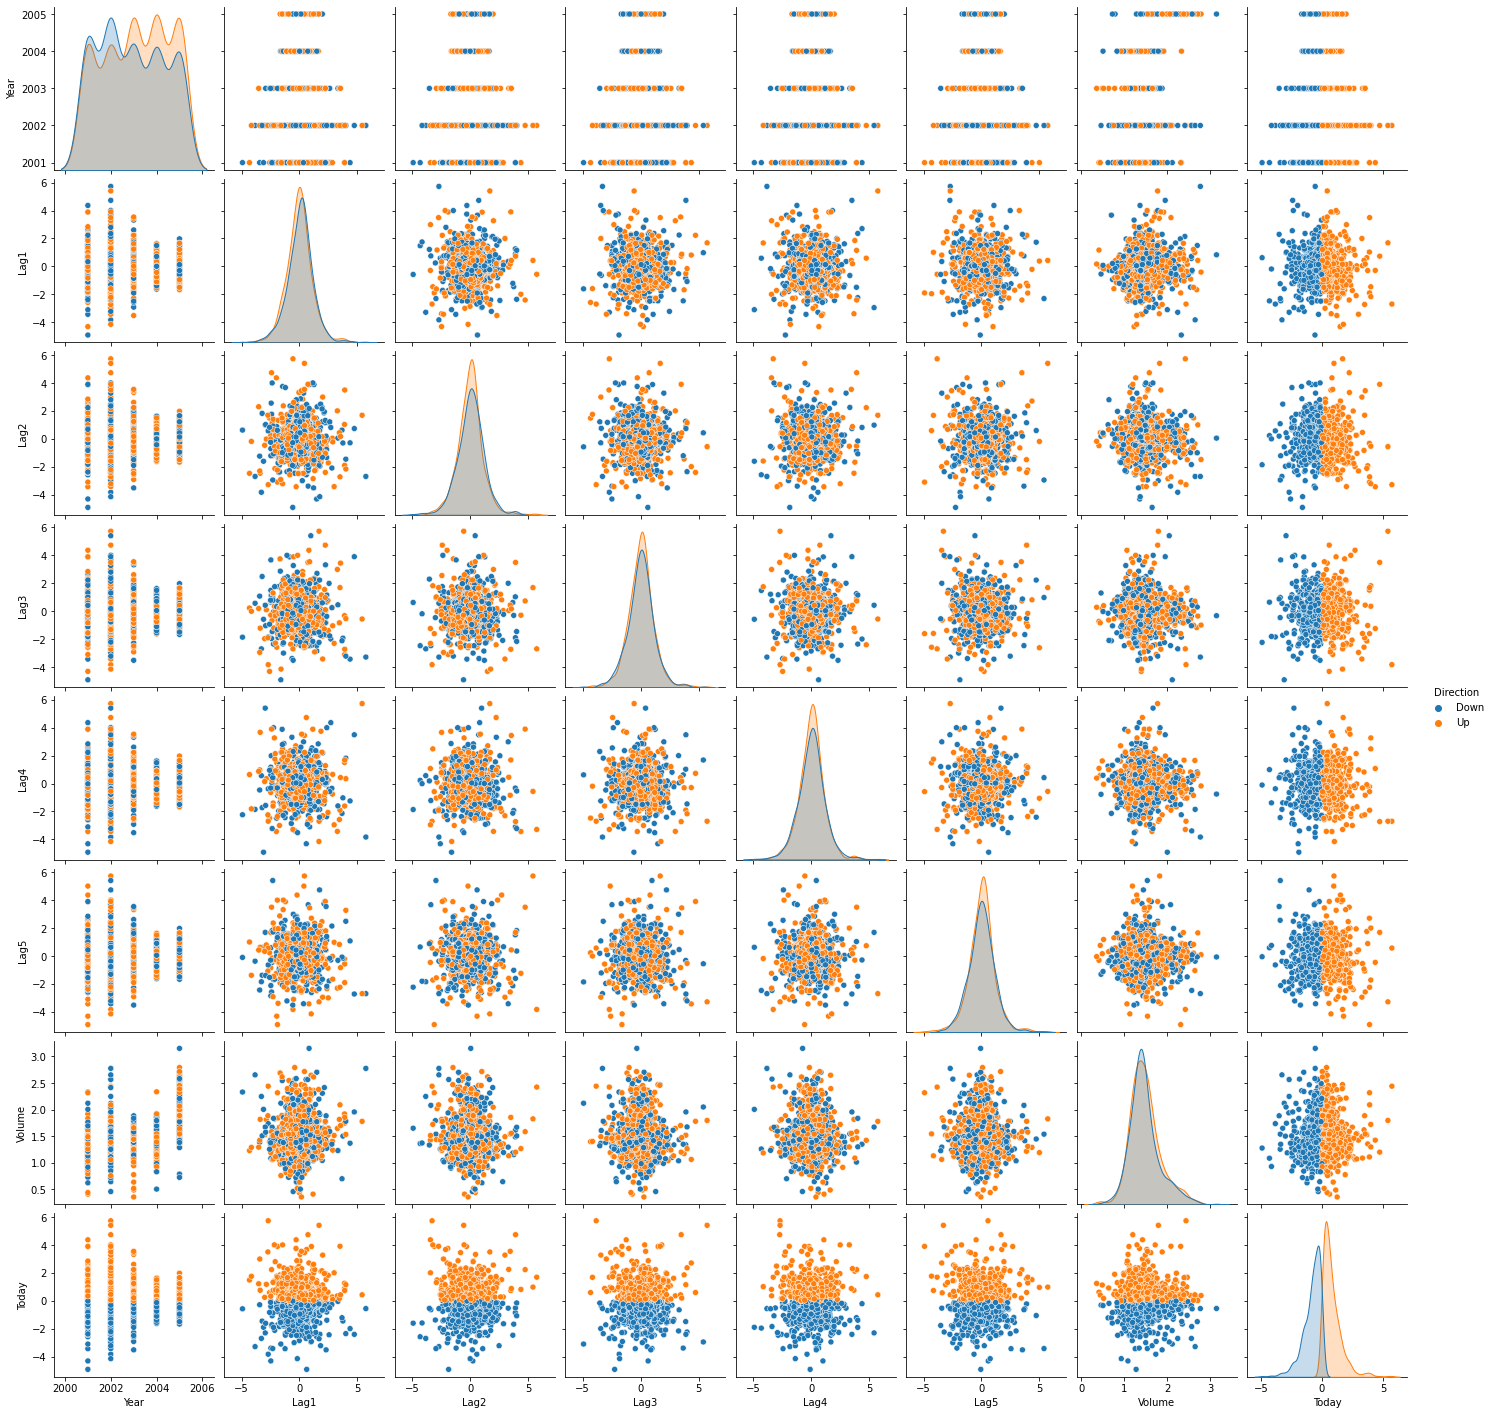

In [7]:
sns.pairplot(df, hue='Direction')

In [8]:
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


In [27]:
from sklearn.linear_model import LogisticRegression

X_train = df.loc[:, 'Lag1':'Volume']
y_train = df.Direction

In [17]:
m = LogisticRegression()
model_fit = m.fit(X_train, Y_train)

In [31]:
model_fit.intercept_, model_fit.coef_

AttributeError: 'LogisticRegression' object has no attribute 'mse_'

In [35]:
pd.DataFrame({'Prob1': model_fit.predict_proba(X_train)[:, 0],
            'Prob2': model_fit.predict_proba(X_train)[:, 1],
            'Prediction': model_fit.predict(X_train)},
            columns=['Prob1','Prob2','Prediction'])

,Prob1,Prob2,Prediction
0,0.492657,0.507343,Up
1,0.518256,0.481744,Down
2,0.518702,0.481298,Down
3,0.484651,0.515349,Up
4,0.489009,0.510991,Up
...,...,...,...
1245,0.480406,0.519594,Up
1246,0.493903,0.506097,Up
1247,0.460850,0.539150,Up
1248,0.473857,0.526143,Up


In [38]:
# Create confusion matrix to compare prediction with actuals
from sklearn.metrics import confusion_matrix, accuracy_score

cfn_m = pd.DataFrame(confusion_matrix(Y_train, model_fit.predict(X_train)))
cfn_m.columns.name = 'Prediction'
cfn_m.index.name = 'Actual'
cfn_m

Prediction,0,1
Actual,,
0,144,458
1,141,507


In [40]:
print('Accuracy: ' + str(accuracy_score(Y_train, model_fit.predict(X_train))))
print('Training Error: ' + str(1 - accuracy_score(Y_train, model_fit.predict(X_train))))

Accuracy: 0.5208
Training Error: 0.47919999999999996


In [54]:
# Split dataset into train and test set to get better evaluation of model
X_train = df.loc[df.Year < 2005, 'Lag1':'Volume']
X_test = df.loc[df.Year >= 2005, 'Lag1':'Volume']

y_train = df.loc[df.Year < 2005, 'Direction']
y_test = df.loc[df.Year >= 2005, 'Direction']

In [60]:
m = LogisticRegression()
m_fit = m.fit(X_train, y_train)

cfn_m = pd.DataFrame(confusion_matrix(y_test, m_fit.predict(X_test)))
cfn_m.columns.name = 'Prediction'
cfn_m.index.name = 'Actual'
cfn_m

Prediction,0,1
Actual,,
0,74,37
1,93,48


In [61]:
print('Accuracy: ' + str(accuracy_score(y_test, m_fit.predict(X_test))))
print('Testing Error: ' + str(1 - accuracy_score(y_test, m_fit.predict(X_test))))

Accuracy: 0.48412698412698413
Testing Error: 0.5158730158730158


In [69]:
# Fit model against only Lag1 + Lag2 since they have the highest correlation with Direction
X_train2 = X_train.loc[:, 'Lag1':'Lag2']
X_test2 = X_test.loc[:, 'Lag1':'Lag2']
m_fit2 = m.fit(X_train2, y_train)

cfn_m = pd.DataFrame(confusion_matrix(y_test, m_fit2.predict(X_test2)))
cfn_m.columns.name = 'Prediction'
cfn_m.index.name = 'Actual'
cfn_m

Prediction,0,1
Actual,,
0,35,76
1,35,106


In [70]:
print('Accuracy: ' + str(accuracy_score(y_test, m_fit.predict(X_test2))))
print('Testing Error: ' + str(1 - accuracy_score(y_test, m_fit.predict(X_test2))))

Accuracy: 0.5595238095238095
Testing Error: 0.44047619047619047


In [74]:
# Fit model to particular values
dummy_df = pd.DataFrame({'Lag1': [1.2,1.5], 'Lag2': [1.1,-0.8]}, columns= ['Lag1','Lag2'])
m_fit2.predict_proba(dummy_df)[:,1]

array([0.47922465, 0.49614354])

In [ ]:
'''

LINEAR DISCRIMINANT ANALYSIS (LDA)

'''

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_m = LinearDiscriminantAnalysis()
lda_m.fit(X_train2, y_train)

# Prior Probs of groups
{'Up': lda_m.priors_[0], 'Down': lda_m.priors_[1]}

{'Up': 0.49198396793587174, 'Down': 0.5080160320641283}

In [91]:
# class predictor means
lda_m.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [94]:
# predcictor coefs
lda_m.scalings_

array([[-0.64201904],
       [-0.51352928]])